In [5]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [6]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [7]:
Tickers = cac40.iloc[[5,9,29], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA', 'ACA.PA', 'GLE.PA']

In [8]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [9]:
data_1 = yf.Ticker(symbols[0])
data_2 = yf.Ticker(symbols[1])
data_3 = yf.Ticker(symbols[2])

BNP = data_1.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')
CA = data_2.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')
SG = data_3.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')

In [10]:
BNP = BNP[['Close']]
BNP

,Close
Date,
2013-02-07 00:00:00+01:00,25.455400
2013-02-08 00:00:00+01:00,26.057241
2013-02-11 00:00:00+01:00,26.147810
2013-02-12 00:00:00+01:00,26.898645
2013-02-13 00:00:00+01:00,26.787632
...,...
2023-01-31 00:00:00+01:00,62.900002
2023-02-01 00:00:00+01:00,63.189999
2023-02-02 00:00:00+01:00,61.599998


In [11]:
CA = CA[['Close']]
CA

,Close
Date,
2013-02-07 00:00:00+01:00,4.274646
2013-02-08 00:00:00+01:00,4.570650
2013-02-11 00:00:00+01:00,4.610448
2013-02-12 00:00:00+01:00,4.748501
2013-02-13 00:00:00+01:00,4.683827
...,...
2023-01-31 00:00:00+01:00,11.036000
2023-02-01 00:00:00+01:00,11.074000
2023-02-02 00:00:00+01:00,11.188000


In [12]:
SG = SG[['Close']]
SG

,Close
Date,
2013-02-07 00:00:00+01:00,17.055262
2013-02-08 00:00:00+01:00,17.546795
2013-02-11 00:00:00+01:00,17.329865
2013-02-12 00:00:00+01:00,17.939468
2013-02-13 00:00:00+01:00,17.299656
...,...
2023-01-31 00:00:00+01:00,27.280001
2023-02-01 00:00:00+01:00,27.375000
2023-02-02 00:00:00+01:00,27.500000


Text(0, 0.5, 'Price')

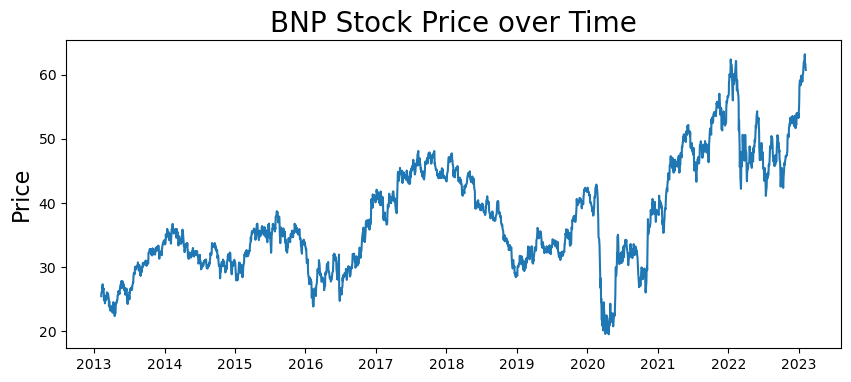

In [96]:
plt.figure(figsize=(10,4))
plt.plot(BNP.Close)
plt.title('BNP Stock Price over Time', fontsize = 20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

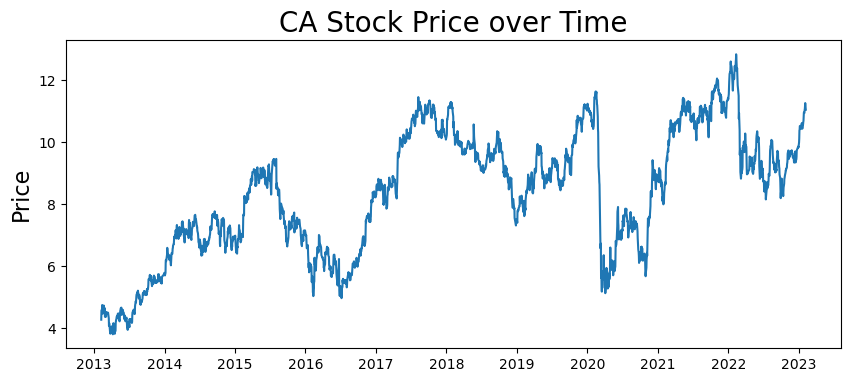

In [97]:
plt.figure(figsize=(10,4))
plt.plot(CA.Close)
plt.title('CA Stock Price over Time', fontsize = 20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

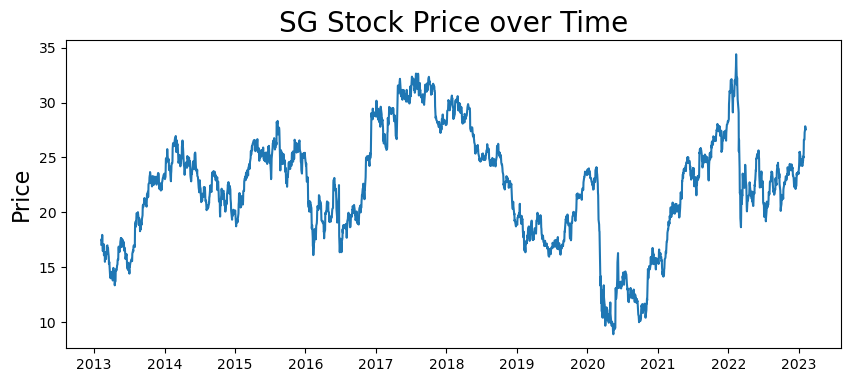

In [98]:
plt.figure(figsize=(10,4))
plt.plot(SG.Close)
plt.title('SG Stock Price over Time', fontsize = 20)
plt.ylabel('Price', fontsize=16)

In [99]:
# Visually, we can see that the series are not stationary

**ADF TEST**  

i use the Augmented Dickey Fuller (ADF) test to check if the price series is stationary.  

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value is greater than 0.05 we'll need to find the order of differencing.

In [100]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(BNP.Close.dropna())
print(f"ADF statistic : {result1[0]}")
print(f"p value : {result1[1]}")

ADF statistic : -1.693031098621984
p value : 0.43470659420168695


In [101]:
result2 = adfuller(CA.Close.dropna())
print(f"ADF statistic : {result2[0]}")
print(f"p value : {result2[1]}")

ADF statistic : -2.539146396044592
p value : 0.1062377264853756


In [102]:
result3 = adfuller(SG.Close.dropna())
print(f"ADF statistic : {result3[0]}")
print(f"p value : {result3[1]}")

ADF statistic : -2.557302675502159
p value : 0.10214687862721783


In [103]:
# The Dick and Fuller test confirmed our assumptions

In [104]:
# We can use the pmdarima package to get the number of differencing

In [105]:
from pmdarima.arima.utils import ndiffs

In [106]:
ndiffs(BNP, test ='adf')

1

In [107]:
ndiffs(CA, test ='adf')

1

In [108]:
ndiffs(SG, test ='adf')

1

**Stationarity**  

I simply subtract the previous value from the current value.  

Now if i just difference once, we might not get a stationary series so we might need to do that multiple times.  

In this case, the pmdarima package gives me the answer to this question, I have to difference once.


In [109]:
BNP['FirstDifference'] = BNP.diff().dropna()

In [110]:
BNP

,Close,FirstDifference
Date,,
2013-02-07 00:00:00+01:00,25.455400,NaN
2013-02-08 00:00:00+01:00,26.057240,0.601839
2013-02-11 00:00:00+01:00,26.147804,0.090565
2013-02-12 00:00:00+01:00,26.898645,0.750841
2013-02-13 00:00:00+01:00,26.787626,-0.111019
...,...,...
2023-01-31 00:00:00+01:00,62.900002,0.790001
2023-02-01 00:00:00+01:00,63.189999,0.289997
2023-02-02 00:00:00+01:00,61.599998,-1.590000


Text(0, 0.5, 'Price Difference')

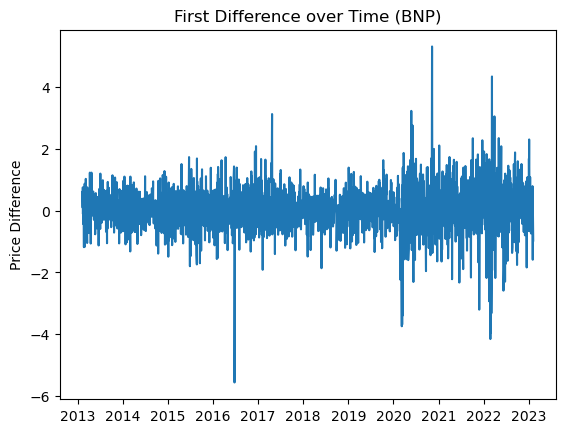

In [111]:
plt.plot(BNP['FirstDifference'])
plt.title('First Difference over Time (BNP)')
plt.ylabel('Price Difference')

In [112]:
CA['FirstDifference'] = CA.diff().dropna()

In [113]:
CA

,Close,FirstDifference
Date,,
2013-02-07 00:00:00+01:00,4.274645,NaN
2013-02-08 00:00:00+01:00,4.570650,0.296004
2013-02-11 00:00:00+01:00,4.610449,0.039799
2013-02-12 00:00:00+01:00,4.748500,0.138052
2013-02-13 00:00:00+01:00,4.683827,-0.064673
...,...,...
2023-01-31 00:00:00+01:00,11.036000,0.094000
2023-02-01 00:00:00+01:00,11.074000,0.038000
2023-02-02 00:00:00+01:00,11.188000,0.113999


Text(0, 0.5, 'Price Difference')

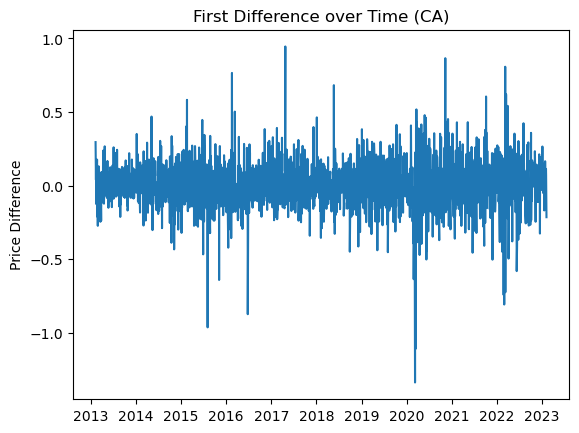

In [114]:
plt.plot(CA['FirstDifference'])
plt.title('First Difference over Time (CA)')
plt.ylabel('Price Difference')

In [115]:
SG['FirstDifference'] = SG.diff().dropna()

In [116]:
SG

,Close,FirstDifference
Date,,
2013-02-07 00:00:00+01:00,17.055265,NaN
2013-02-08 00:00:00+01:00,17.546795,0.491529
2013-02-11 00:00:00+01:00,17.329865,-0.216930
2013-02-12 00:00:00+01:00,17.939472,0.609608
2013-02-13 00:00:00+01:00,17.299658,-0.639814
...,...,...
2023-01-31 00:00:00+01:00,27.280001,0.665001
2023-02-01 00:00:00+01:00,27.375000,0.094999
2023-02-02 00:00:00+01:00,27.500000,0.125000


Text(0, 0.5, 'Price Difference')

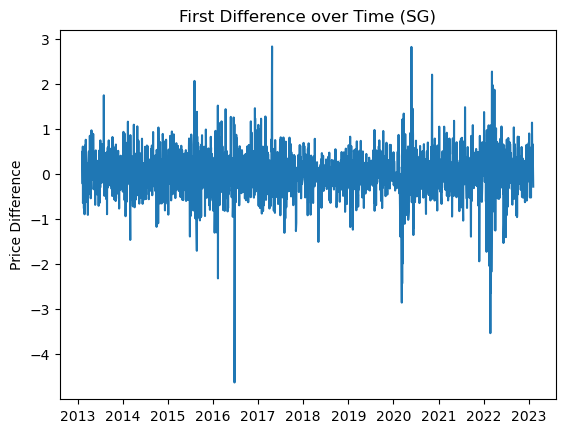

In [117]:
plt.plot(SG['FirstDifference'])
plt.title('First Difference over Time (SG)')
plt.ylabel('Price Difference')

**P**  

P is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.  

We can find out the required number of AR terms by inspecting The Partial Autocorrelation (PACF) plot.  

The partial atocorrelation represents the correlation between the series and its lags

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

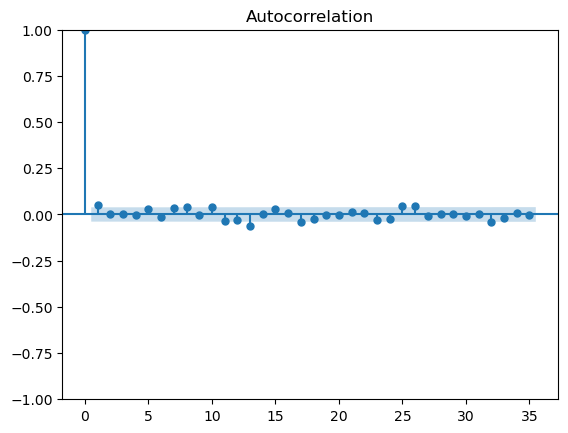

In [119]:
diff = BNP.FirstDifference.dropna()
plot_acf(diff);

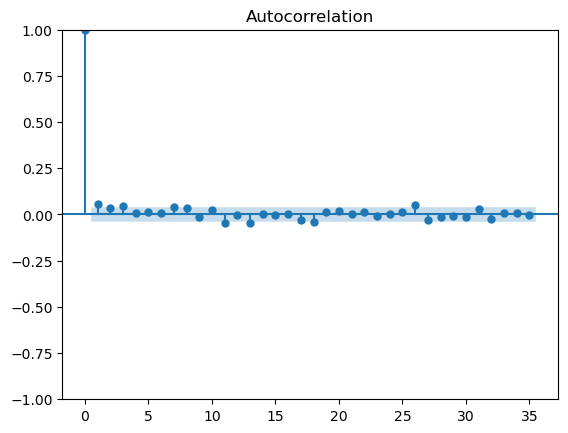

In [120]:
diff = CA.FirstDifference.dropna()
plot_acf(diff);

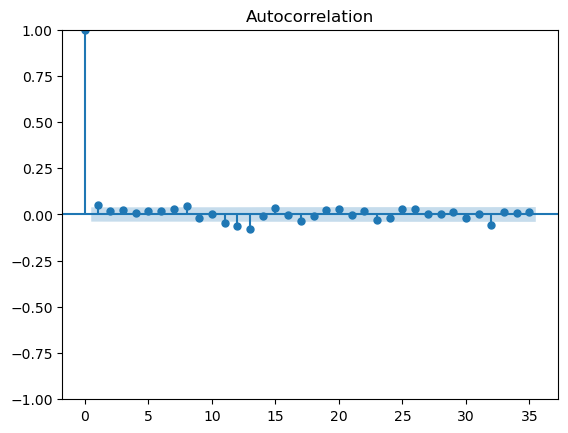

In [121]:
diff = SG.FirstDifference.dropna()
plot_acf(diff);

ACF show no strong evidence of correlation for the all values.
Maybe we should use another model for forecasting 

In [122]:
returns_BNP = 100*BNP.Close.pct_change().dropna() 
returns_CA = 100*CA.Close.pct_change().dropna()
returns_SG = 100*SG.Close.pct_change().dropna()

# Percent change of BNP, Credit Agricole and Société Générale stocks bewteen 1 day and the next

Text(0.5, 1.0, 'BNP Returns')

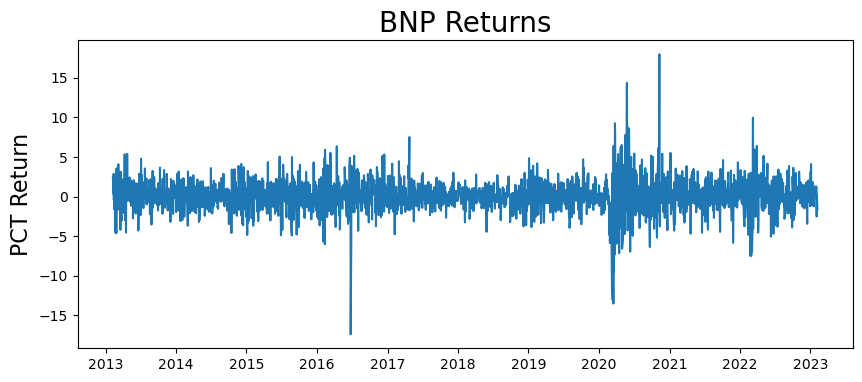

In [123]:
plt.figure(figsize=(10,4))
plt.plot(returns_BNP)
plt.ylabel('PCT Return', fontsize=16)
plt.title('BNP Returns', fontsize=20)

Text(0.5, 1.0, 'CA Returns')

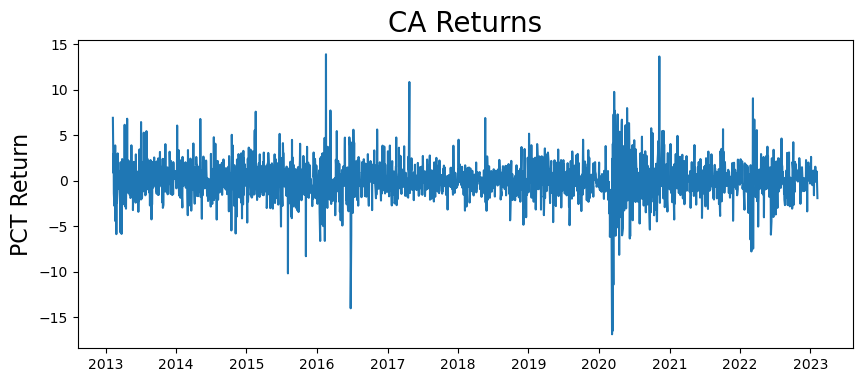

In [124]:
plt.figure(figsize=(10,4))
plt.plot(returns_CA)
plt.ylabel('PCT Return', fontsize=16)
plt.title('CA Returns', fontsize=20)

Text(0.5, 1.0, 'SG Returns')

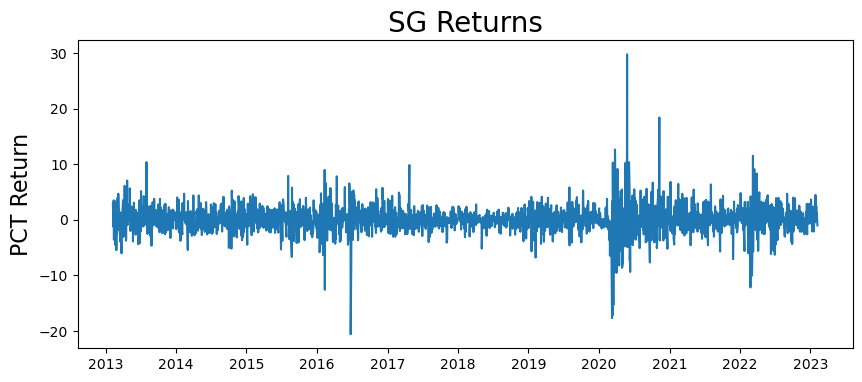

In [125]:
plt.figure(figsize=(10,4))
plt.plot(returns_SG)
plt.ylabel('PCT Return', fontsize=16)
plt.title('SG Returns', fontsize=20)

We can clearly see for both 3 graphs that they are periods of much higher volatility than other periods (volatility clustering).

Especially in 2020, due to the coronavirus pandemic.  

So this 3 stock vaues return are good candidates for GARCH modelling.  

**GARCH model**:  

GARCH stends for Generalized Auto Regressive Conditional Heteroscedasticity. A  GARCH  model  is  used  to  capture volatility clustering in  stock prices  time series. The goal of this model is to provide a volatility measure –like a standard  deviation– that  can  be  used  in  financial decisions.




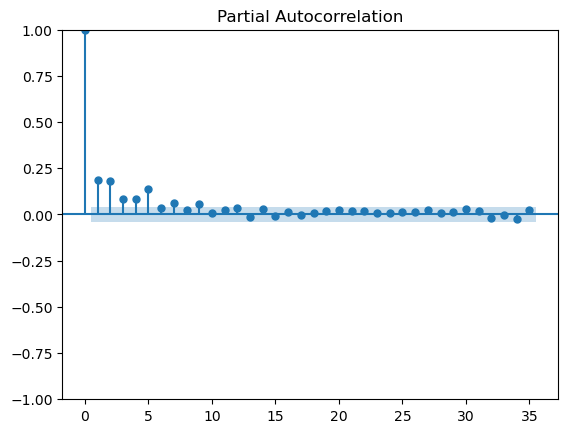

In [126]:
plot_pacf(returns_BNP**2);

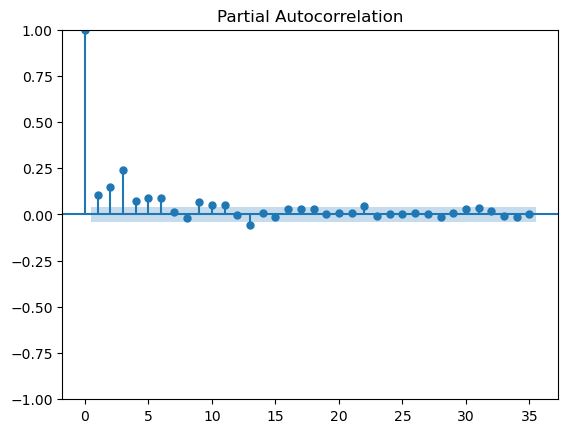

In [127]:
plot_pacf(returns_CA**2);

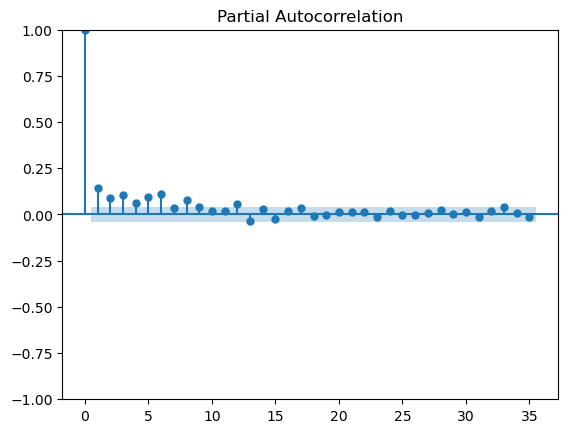

In [128]:
plot_pacf(returns_SG**2);

In [129]:
from arch import arch_model

In [130]:
model = arch_model(returns_BNP,p = 2, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2293661.9137614444
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12141.899762561387
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5493.579463160793
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5727.040281364749
Iteration:      5,   Func. Count:     47,   Neg. LLF: 5111.614714976984
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5113.760237137278
Iteration:      7,   Func. Count:     64,   Neg. LLF: 5079.044915307418
Iteration:      8,   Func. Count:     71,   Neg. LLF: 5078.940613502666
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5079.785724647743
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5079.132667752807
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5079.252860610115
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5078.781396921777
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5078.775592809566
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5078.769

In [131]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5078.77
Distribution:                  Normal   AIC:                           10169.5
Method:            Maximum Likelihood   BIC:                           10204.6
                                        No. Observations:                 2560
Date:                Fri, Feb 10 2023   Df Residuals:                     2559
Time:                        14:48:44   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0586  3.212e-02      1.825  6.795e-02 [-4.325e-03,  0.122]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1277  4.782e-02      2.669  7.602e-03  [3.392e-02,  0.221]
alpha[1]       0.0780  2.007e-02      3.886  1.020e-04  [3.864e-02,  0.117]
alpha[2]       0.0828  3.020e-02      2.742  6.100e-03  [2.362e-02,  0.142]
beta[1]        0.0696  7.149e-02      0.973      0.331 [-7.055e-02,  0.210]
beta[2]        0.7395  6.552e-02     11.287  1.522e-29    [  0.611,  0.868]
===========================================================================

Covariance estimator: robust
"""

In [132]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns_BNP[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [133]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_BNP.index[-365:])

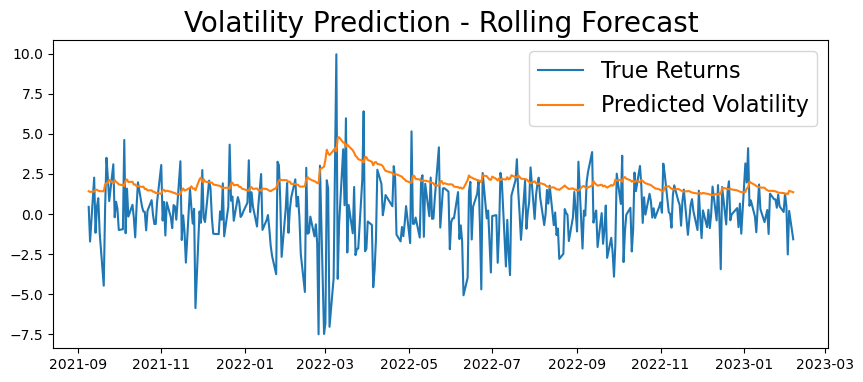

In [134]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_BNP[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [135]:
# The orange line is the prediction of the GARCH process (volatility)

In [136]:
train = returns_BNP
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [137]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns_BNP.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

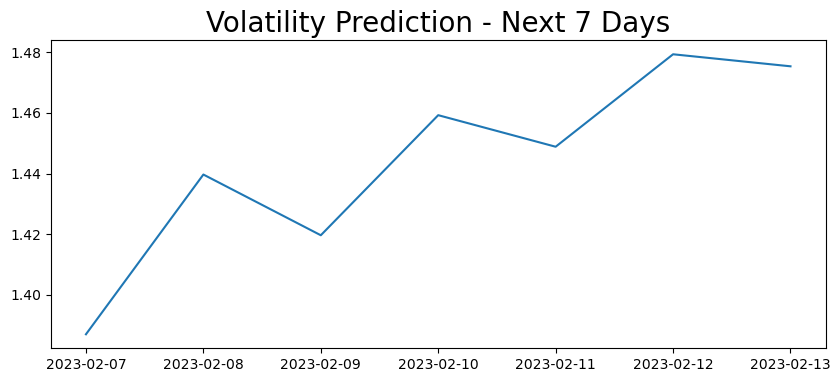

In [138]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [140]:
model = arch_model(returns_CA,p = 3, q = 3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 190202.40676642294
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1458285725.2794647
Iteration:      3,   Func. Count:     34,   Neg. LLF: 737289208.1580348
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5385.415241382736
Iteration:      5,   Func. Count:     54,   Neg. LLF: 5458.757393290811
Iteration:      6,   Func. Count:     64,   Neg. LLF: 5308.4916595042805
Iteration:      7,   Func. Count:     74,   Neg. LLF: 5326.498296109974
Iteration:      8,   Func. Count:     84,   Neg. LLF: 5225.153183638061
Iteration:      9,   Func. Count:     95,   Neg. LLF: 5193.265362458412
Iteration:     10,   Func. Count:    105,   Neg. LLF: 5191.853970556998
Iteration:     11,   Func. Count:    115,   Neg. LLF: 5191.856128092564
Iteration:     12,   Func. Count:    125,   Neg. LLF: 5191.496393471727
Iteration:     13,   Func. Count:    134,   Neg. LLF: 5191.474265149996
Iteration:     14,   Func. Count:    143,   Neg. LLF: 5191.47

In [141]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5191.47
Distribution:                  Normal   AIC:                           10398.9
Method:            Maximum Likelihood   BIC:                           10445.7
                                        No. Observations:                 2560
Date:                Fri, Feb 10 2023   Df Residuals:                     2559
Time:                        16:23:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0973  3.482e-02      2.794  5.205e-03 [2.904e-02,  0.166]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2708      0.109      2.491  1.275e-02 [5.769e-02,  0.484]
alpha[1]       0.0632  2.911e-02      2.169  3.007e-02 [6.091e-03,  0.120]
alpha[2]       0.0697  3.529e-02      1.974  4.841e-02 [4.859e-04,  0.139]
alpha[3]       0.0693  2.675e-02      2.590  9.610e-03 [1.684e-02,  0.122]
beta[1]    5.5250e-13      0.150  3.683e-12      1.000   [ -0.294,  0.294]
beta[2]        0.0889      0.185      0.480      0.631   [ -0.274,  0.451]
beta[3]        0.6424      0.147      4.371  1.238e-05   [  0.354,  0.930]
==========================================================================

Covariance estimator: robust
"""

In [142]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns_CA[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [144]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_CA.index[-365:])

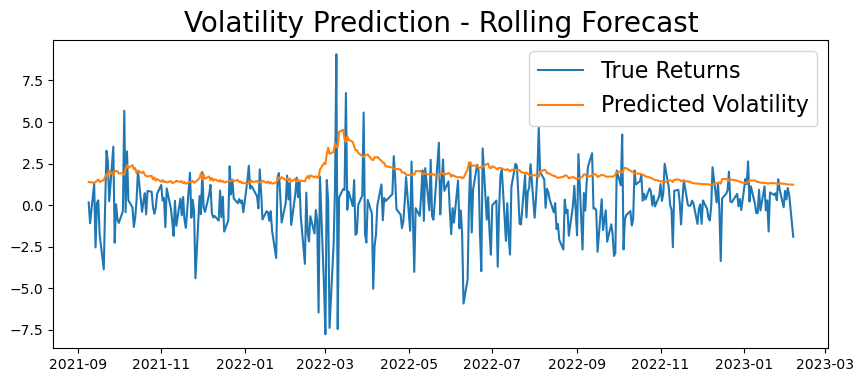

In [145]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_CA[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)